<center>

# **Xiaomi Corporation (1810.HK) Adjusted Closing Stock Price Prediction with PSO-Prophet Algorithm**

</center>

## **Project Metadata**

* **Project Metadata**

| Metadata | Details |
|----------|---------|
| <center> **Title** </center> | Xiaomi Corporation (1810.HK) Adjusted Closing Stock Price Prediction with PSO-Prophet Algorithm |
| <center> **Description** </center>  | Experimenting with the implementation of the Prophet algorithm combined with PSO algorithm to predict the Adjusted Closing Stock Price of Xiaomi Corporation (1810.HK). After experimenting, we will predict the Adjusted Closing Stock Price of Xiaomi Corporation for the next day and evaluate the prediction performance. |
| <center> **Dataset Used** </center> | Xiaomi.csv (Xiaomi Corporation (1810.HK) Stock Price from 10th July, 2018 to 10th July, 2023) |
| <center> **Author** </center> | Alfrethanov Christian Wijaya |
| <center> **Project Duration** </center> | October 17th, 2023 - October 19th, 2023 |
| <center> **GitHub** </center> | Arckitecht |
| <center> **Linkedin** </center> | Alfrethanov Christian Wijaya |
| <center> **License** </center> | .... |

<br>

* **Prediction Target :** &ensp;`Adjusted Close (Adj Close)`

## **Experimental Dataset Metadata**

*   **Dataset Metadata**

| Metadata | Details |
|----------|---------|
| <center> **Dataset Title** </center> | Xiaomi Corporation (1810.HK) Stock Price from 10th July, 2018 to 10th July, 2023 |
| <center> **Dataset Name** </center> | `Xiaomi.csv` |
| <center> **Description** </center>  | A dataset of Xiaomi Corporation (1810.HK) stock prices from 10th July, 2018 to 10th July, 2023 collected from Yahoo Finance. |
| <center> **Data Period** </center>  | 10th July, 2018 - 10th July, 2023 |
| <center> **Columns** </center> | `7` |
| <center> **Rows** </center> | `1.233` |
| <center> **Source** </center> | Yahoo Finance |
| <center> **Source Link** </center> | https://finance.yahoo.com/quote/1810.HK/history?period1=1531180800&period2=1689033600&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true |

<br>

* **Dataset Columns**

| Columns / Features | Uniqueness | Data Types | Descriptions |
|----------|---------|---------|---------|
| <center> **Date** </center> | <center> `Unique` </center> | <center> `Date` </center> | Date of the trading. |
| <center> **Open** </center> | <center> `Non-Unique` </center> | <center> `Float` </center> | Price at which the financial security opens in the stock market at the start of trading. |
| <center> **High** </center> | <center> `Non-Unique` </center>  | <center> `Float` </center> | Highest price at which the security traded during the day. |
| <center> **Low** </center> | <center> `Non-Unique` </center> | <center> `Float` </center> | Lowest price at which the security traded during the day. |
| <center> **Close** </center> | <center> `Non-Unique` </center> | <center> `Float` </center> | The last price at which the security is traded during regular trading hours after the stock market has already closed for the day. |
| <center> **Volume** </center> | <center> `Non-Unique` </center> | <center> `Integer` </center> | Number of shares traded in a stock or contracts traded in futures or options. |
| <center> **Adj Close** </center> | <center> `Non-Unique` </center> | <center> `Float` </center> | Closing price of a stock adjusted to reflect its value after accounting. |

# **[&ensp; ] -------------------- PREPARATION -------------------- [&ensp; ]**

# **Install Required Libraries**

In [ ]:
# If hasn't installed the "ydata-profiling" library
# !pip install ydata-profiling

In [ ]:
# If hasn't installed the "prophet" library
!pip install prophet

In [ ]:
# If hasn't installed the "pyswarm" library
!pip install pyswarm

  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=8baa351b8bf59cf28549864fec0aebf79c60cfa0f89dc463e4423d1334898d6d
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm


In [ ]:
# help(Prophet)

# **Data Preprocessing**

## **Import Libraries**

In [ ]:
# Import Libraries
# Linear Algebra Library
import numpy as np # Linear algebra
import statistics
from sympy import symbols, init_printing, latex
from scipy.stats import laplace, norm

# Data Processing Libraries
import pandas as pd # Data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime, timedelta

# Visualizations Libraries
%matplotlib inline
import matplotlib.pyplot as plt # Plotting graphs and chaarts
import seaborn as sns # Drawing statistical graphics
# from ydata_profiling import ProfileReport # Pandas Profiling (for EDA / Exploratory Data Analysis)

# Model / Algorithm Libraries
from pyswarm import pso # For PSO Algorithm
from prophet import Prophet # For Prophet Algorithm
from prophet.utilities import regressor_coefficients
from prophet.serialize import model_to_json, model_from_json
import time # For timer

# Cross Validation / Model Evaluation Libraries
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score

## **Import Dataset**

In [ ]:
dt = pd.read_csv("Xiaomi Corp. (1810.HK).csv")

## **Data Preprocessing**

### **Data Understanding**

In [ ]:
dt.head().style.set_properties(**{'font-family': 'Segoe UI'}).hide(axis="index")

In [ ]:
dt.tail().style.set_properties(**{'font-family': 'Segoe UI'}).hide(axis="index")

In [ ]:
# --- Dataset Info ---
print('\033[1m'+'Dataset Info'+'\033[0m')
print('*' * 45)
print('Total Rows:'+'\033[1m', dt.shape[0])
print('\033[0m'+'Total Columns:'+'\033[1m', dt.shape[1])
print('\033[0m'+'*' * 45)
print('\n')

# --- Dataset Detail ---
print('\033[1m'+'Dataset Details'+'\033[0m')
print('*' * 45)
dt.info(memory_usage = False)

Dataset Info
*********************************************
Total Rows: 1318
Total Columns: 7
*********************************************


Dataset Details
*********************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1318 entries, 0 to 1317
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1318 non-null   object 
 1   Open       1318 non-null   float64
 2   High       1318 non-null   float64
 3   Low        1318 non-null   float64
 4   Close      1318 non-null   float64
 5   Adj Close  1318 non-null   float64
 6   Volume     1318 non-null   int64  
dtypes: float64(5), int64(1), object(1)

In [ ]:
dt.describe().style.set_properties(**{'font-family': 'Segoe UI'})

#### **Data Correlations**

<ipython-input-7-b1ee27f61a23>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = dt.corr()


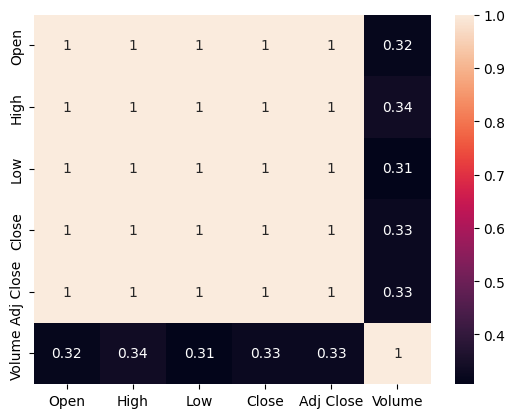

In [ ]:
# Constructing a heatmap to understand the data correlations
correlation = dt.corr()
sns.heatmap(correlation, annot=True, fmt='.2g')
plt.show()

In [ ]:
# Correlation values of Adj Close
print(correlation['Adj Close'])

Open         0.997546
High         0.999037
Low          0.998894
Close        1.000000
Adj Close    1.000000
Volume       0.326088
Name: Adj Close, dtype: float64


1. The <b>`Open`</b>, <b>`High`</b>, <b>`Low`</b>, and <b>`Close`</b> columns are **Highly Positively Correlated** with the <b>`Adj Close`</b> column.
2. The <b>`Volume`</b> column is **Lowly Positively Correlated** with the <b>`Adj Close`</b> column.

#### **Volume Percentage**

In [ ]:
# int(dt[dt['Date'] == '2023-11-13']['Volume'].values)

In [ ]:
# int(dt[dt['Date'] == '2018-07-10']['Volume'].values)

In [ ]:
# vol = ((534072218 - 151924036) / (151924036) ) * 100
# vol

### **Data Splitting**

#### **Data Transforming**

In [ ]:
dt.shape

(1318, 7)

In [ ]:
dt['Date'] = pd.to_datetime(dt['Date'])

In [ ]:
dt.rename(columns={"Date": "ds", "Adj Close": "y"}, inplace=True)

#### **Data Splitting**

In [ ]:
dt_train = dt.copy()
dt_test = dt.copy()

In [ ]:
# Training Data
dt_x = dt_train.drop(dt_train[1054:].index)
dt_x.shape

(1054, 7)

In [ ]:
dt_x.head()

ds       Open       High        Low      Close          y     Volume
0 2018-07-10  17.000000  19.340000  17.000000  19.000000  19.000000  534072218
1 2018-07-11  18.500000  19.799999  18.299999  19.000000  19.000000  374721138
2 2018-07-12  19.400000  19.700001  19.020000  19.260000  19.260000  132592630
3 2018-07-13  19.600000  21.799999  19.520000  21.450001  21.450001  364065075
4 2018-07-16  19.940001  21.299999  19.400000  21.049999  21.049999  211621432

In [ ]:
dt_x.tail()

ds  Open  High   Low  Close     y     Volume
1049 2022-10-10  8.83  8.98  8.77   8.92  8.92   60424156
1050 2022-10-11  8.92  9.04  8.67   8.74  8.74   80383810
1051 2022-10-12  8.72  8.92  8.31   8.68  8.68  120062330
1052 2022-10-13  8.68  8.93  8.49   8.52  8.52   70074062
1053 2022-10-14  8.66  8.98  8.53   8.62  8.62   93032719

In [ ]:
# Testing Data
dt_y = dt_test.drop(dt_test[:-264].index)
dt_y.shape

(264, 7)

In [ ]:
dt_y.head()

ds  Open  High   Low  Close     y     Volume
1054 2022-10-17  8.60  8.89  8.50   8.73  8.73   79775699
1055 2022-10-18  8.92  9.19  8.76   9.14  9.14  103845201
1056 2022-10-19  9.14  9.18  8.93   8.94  8.94   83039310
1057 2022-10-20  8.84  9.20  8.66   9.11  9.11  113527723
1058 2022-10-21  9.26  9.31  9.09   9.25  9.25   76970263

In [ ]:
dt_y.tail()

ds       Open       High    Low      Close          y     Volume
1313 2023-11-07  15.300000  15.960000  15.30  15.820000  15.820000  100277922
1314 2023-11-08  15.880000  16.400000  15.76  16.139999  16.139999  141748758
1315 2023-11-09  16.320000  16.940001  16.26  16.520000  16.520000  162320904
1316 2023-11-10  16.219999  16.719999  15.94  16.040001  16.040001  166672948
1317 2023-11-13  16.420000  16.620001  15.92  16.219999  16.219999  151924036

In [ ]:
dt_pred = dt_y.copy()
dt2_pred = dt_y.copy()
dt3_pred = dt_y.copy()
dt4_pred = dt_y.copy()

In [ ]:
# Forecasting Data for P-PR Model
dt_pred = dt_pred.drop('y', axis=1)

# Forecasting Data for P-P Model
dt2_pred = dt2_pred.drop(['y','Open','High','Low','Close','Volume'], axis=1)

# Forecasting Data for PR Model
dt3_pred = dt3_pred.drop('y', axis=1)

# Forecasting Data for P Model
dt4_pred = dt4_pred.drop(['y','Open','High','Low','Close','Volume'], axis=1)

In [ ]:
# Train + Test Dataset for P-P Model
dt2_x = dt_x.copy()
dt2_y = dt_y.copy()
dt2 = dt.copy()

# Train + Test Dataset for PR Model
dt3_x = dt_x.copy()
dt3_y = dt_y.copy()
dt3 = dt.copy()

# Train + Test Dataset for P Model
dt4_x = dt_x.copy()
dt4_y = dt_y.copy()
dt4 = dt.copy()

# **[&ensp; ] -------------------- BUILD MODELS -------------------- [&ensp; ]**

<center>

# **Model Training**

</center>

## **Additional Regressors**

In [ ]:
# Additional Regressors
regressors = ['Open','High','Low','Close','Volume']

## **P-PR Model**
* P-PR : PSO and Prophet **with** Regressor

### **Train the Model**

#### **Train PSO-Prophet Model #1**

##### **PSO for Prophet Optimization Function**

In [ ]:
# # Holidays
# CNY = pd.DataFrame({
#   'holiday': 'CNY',
#   'ds': pd.to_datetime(['2019-02-05', '2020-01-25', '2021-02-12', '2022-02-01', '2023-01-22'])
#   })

In [ ]:
parameters_x = {
    'positions': [],
    'changepoint_prior_scale': [],
    'seasonality_prior_scale': [],
    'holidays_prior_scale': [],
    'MSE': []
}

In [ ]:
# Create a function for optimization
def optimize_prophet(params, dt_x, dt):
  # Extract the parameters
  changepoint_prior_scale = params[0]
  seasonality_prior_scale = params[1]
  holidays_prior_scale = params[2]

  if changepoint_prior_scale < 0.001:
    changepoint_prior_scale = 0.001
  elif seasonality_prior_scale < 0.01:
    seasonality_prior_scale = 0.01
  elif holidays_prior_scale < 0.01:
    holidays_prior_scale = 0.01

  position = len(parameters_x['positions']) + 1
  parameters_x['positions'].append(position)
  parameters_x['changepoint_prior_scale'].append(changepoint_prior_scale)
  parameters_x['seasonality_prior_scale'].append(seasonality_prior_scale)
  parameters_x['holidays_prior_scale'].append(holidays_prior_scale)

  # Create and fit the Prophet model
  model = Prophet(
      changepoint_prior_scale=changepoint_prior_scale,
      seasonality_prior_scale=seasonality_prior_scale,
      holidays_prior_scale=holidays_prior_scale
      )

  # Add the regressors
  for i in regressors:
    model.add_regressor(i)

  # Fit the model with the Training Data (dt_x)
  model.fit(dt_x)

  # Predict
  predict = model.predict(dt_pred)

  # Calculate the mean squared error
  mse = mean_squared_error(dt_y['y'], predict['yhat'])

  parameters_x['MSE'].append(mse)

  return mse

##### **Optimize Prophet with PSO**

In [ ]:
# Initialize the PSO optimizer
lb = [0.001, 0.01, 0.01]  # Lower bounds for parameters
ub = [0.5, 10, 10]  # Upper bounds for parameters

# Start the timer
start_time = time.time()

# PSO
optimizer = pso(optimize_prophet, lb, ub, swarmsize=100, omega=0.6, phip=1.5, phig=1.5, maxiter=50, minfunc=1e-12, debug=True, args=(dt_x, dt))

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"\nThe PSO algorithm took {elapsed_time} seconds to complete.")

No constraints given.


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/u8wucrij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/u3w17fpl.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=78267', 'data', 'file=/tmp/tmp7b2pj4c9/u8wucrij.json', 'init=/tmp/tmp7b2pj4c9/u3w17fpl.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelwy5mydxs/prophet_model-20240325110418.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:04:18 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:04:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b

New best for swarm at iteration 1: [0.37850615 0.01       8.91934243] 3.5081400082321803e-09


11:10:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/f7ak9h05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/9qb1jzav.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=65075', 'data', 'file=/tmp/tmp7b2pj4c9/f7ak9h05.json', 'init=/tmp/tmp7b2pj4c9/9qb1jzav.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelo_pj36du/prophet_model-20240325111014.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.e-03 1.e-02 1.e+01] 2.542146896964333e-10


11:10:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/gte4qzgu.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/8p288495.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59710', 'data', 'file=/tmp/tmp7b2pj4c9/gte4qzgu.json', 'init=/tmp/tmp7b2pj4c9/8p288495.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelstiwalas/prophet_model-20240325111027.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.00000000e-03 3.30741054e+00 1.00000000e+01] 1.1299020787259297e-11


11:10:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/ulh9txf8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/h42w8sl6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62869', 'data', 'file=/tmp/tmp7b2pj4c9/ulh9txf8.json', 'init=/tmp/tmp7b2pj4c9/h42w8sl6.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model7sk_o63m/prophet_model-20240325111039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:10:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 1: [1.00000000e-03 3.30741054e+00 1.00000000e+01] 1.1299020787259297e-11


11:12:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/p3laamd6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/xn3hkmsy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12299', 'data', 'file=/tmp/tmp7b2pj4c9/p3laamd6.json', 'init=/tmp/tmp7b2pj4c9/xn3hkmsy.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelrlgo0emz/prophet_model-20240325111221.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:12:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 2: [1.00000000e-03 3.30741054e+00 1.00000000e+01] 1.1299020787259297e-11


11:16:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/o_s6ie7h.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/rmffeex8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89160', 'data', 'file=/tmp/tmp7b2pj4c9/o_s6ie7h.json', 'init=/tmp/tmp7b2pj4c9/rmffeex8.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeld3e5oho4/prophet_model-20240325111601.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:16:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:16:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 3: [1.00000000e-03 3.30741054e+00 1.00000000e+01] 1.1299020787259297e-11


11:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1i6msf_r.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/s0lzyww8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95050', 'data', 'file=/tmp/tmp7b2pj4c9/1i6msf_r.json', 'init=/tmp/tmp7b2pj4c9/s0lzyww8.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelm87bzhhd/prophet_model-20240325111943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 4: [1.00000000e-03 3.30741054e+00 1.00000000e+01] 1.1299020787259297e-11


11:23:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/s7drx69f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/manuusbb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=31057', 'data', 'file=/tmp/tmp7b2pj4c9/s7drx69f.json', 'init=/tmp/tmp7b2pj4c9/manuusbb.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelxtae04xc/prophet_model-20240325112333.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:23:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:23:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 5: [1.0000000e-03 2.8021989e+00 1.0000000e+01] 9.896326079414004e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/b9rs_r8y.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69506', 'data', 'file=/tmp/tmp7b2pj4c9/ve6_iaxt.json', 'init=/tmp/tmp7b2pj4c9/b9rs_r8y.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeljb9g0kwb/prophet_model-20240325112429.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:24:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:24:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/wsuimz1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1ph8udp0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 5: [1.0000000e-03 2.8021989e+00 1.0000000e+01] 9.896326079414004e-12


11:27:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/o75vh87u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/mcijd2l0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14602', 'data', 'file=/tmp/tmp7b2pj4c9/o75vh87u.json', 'init=/tmp/tmp7b2pj4c9/mcijd2l0.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeluj44147e/prophet_model-20240325112707.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:27:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:27:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 6: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:30:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/82tk5muc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/6yel83oz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26069', 'data', 'file=/tmp/tmp7b2pj4c9/82tk5muc.json', 'init=/tmp/tmp7b2pj4c9/6yel83oz.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelpktjbve5/prophet_model-20240325113017.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:30:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:30:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 6: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:30:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/r5ny7wmr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/qzrtzdlq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=738', 'data', 'file=/tmp/tmp7b2pj4c9/r5ny7wmr.json', 'init=/tmp/tmp7b2pj4c9/qzrtzdlq.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelh6k2iop2/prophet_model-20240325113047.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:30:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:30:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run p

Best after iteration 7: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:34:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/9jgklwy8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/esl1y6yx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70186', 'data', 'file=/tmp/tmp7b2pj4c9/9jgklwy8.json', 'init=/tmp/tmp7b2pj4c9/esl1y6yx.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelh_5_9guo/prophet_model-20240325113437.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:34:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:34:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 8: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:38:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/p1kwfpat.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/9wzr_kqj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62370', 'data', 'file=/tmp/tmp7b2pj4c9/p1kwfpat.json', 'init=/tmp/tmp7b2pj4c9/9wzr_kqj.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelih7czu6z/prophet_model-20240325113823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:38:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:38:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 9: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:42:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/zo0lppn5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/w1punqxn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5051', 'data', 'file=/tmp/tmp7b2pj4c9/zo0lppn5.json', 'init=/tmp/tmp7b2pj4c9/w1punqxn.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelb251znji/prophet_model-20240325114212.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:42:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:42:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run 

Best after iteration 10: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:46:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/7mdxkpx2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/uf6yzj0_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=54373', 'data', 'file=/tmp/tmp7b2pj4c9/7mdxkpx2.json', 'init=/tmp/tmp7b2pj4c9/uf6yzj0_.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model4_rlaz1c/prophet_model-20240325114602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:46:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:46:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 11: [1.00000000e-03 4.84451159e+00 1.00000000e+01] 8.806384144925087e-12


11:49:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/22qd5ta0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/su133rxv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97951', 'data', 'file=/tmp/tmp7b2pj4c9/22qd5ta0.json', 'init=/tmp/tmp7b2pj4c9/su133rxv.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelthdyf3w_/prophet_model-20240325114955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:49:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:49:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 12: [1.00000000e-03 2.62561925e+00 1.00000000e+01] 7.3650673787736e-12


11:52:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/r9ryxtug.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/vvr_a9ag.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12056', 'data', 'file=/tmp/tmp7b2pj4c9/r9ryxtug.json', 'init=/tmp/tmp7b2pj4c9/vvr_a9ag.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelsi3sqf__/prophet_model-20240325115200.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:52:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:52:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 12: [1.00000000e-03 2.62561925e+00 1.00000000e+01] 7.3650673787736e-12


11:53:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/20mfx4c1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/rii5pnob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=57416', 'data', 'file=/tmp/tmp7b2pj4c9/20mfx4c1.json', 'init=/tmp/tmp7b2pj4c9/rii5pnob.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model_lyk6wme/prophet_model-20240325115346.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:53:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:53:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 13: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


11:54:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/gc97lspf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/85kqxhyf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99532', 'data', 'file=/tmp/tmp7b2pj4c9/gc97lspf.json', 'init=/tmp/tmp7b2pj4c9/85kqxhyf.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelggmvkj0i/prophet_model-20240325115448.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:54:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:54:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 13: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


11:57:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/3li1ijv_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2ydyzcs6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15588', 'data', 'file=/tmp/tmp7b2pj4c9/3li1ijv_.json', 'init=/tmp/tmp7b2pj4c9/2ydyzcs6.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelv84sc821/prophet_model-20240325115729.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:57:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:57:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 14: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:01:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/u2hlnark.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/iube0d2r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=12546', 'data', 'file=/tmp/tmp7b2pj4c9/u2hlnark.json', 'init=/tmp/tmp7b2pj4c9/iube0d2r.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelb5wtge06/prophet_model-20240325120105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:01:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:01:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 15: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:04:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/t8i_tekx.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/yz9wnvpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44289', 'data', 'file=/tmp/tmp7b2pj4c9/t8i_tekx.json', 'init=/tmp/tmp7b2pj4c9/yz9wnvpa.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelv1ojtvck/prophet_model-20240325120444.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:04:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:04:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 16: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:08:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/z1h1289n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1ynt76u_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73708', 'data', 'file=/tmp/tmp7b2pj4c9/z1h1289n.json', 'init=/tmp/tmp7b2pj4c9/1ynt76u_.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeli3chjmkg/prophet_model-20240325120823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:08:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:08:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 17: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:11:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/hitbo41o.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/oy2__71l.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80714', 'data', 'file=/tmp/tmp7b2pj4c9/hitbo41o.json', 'init=/tmp/tmp7b2pj4c9/oy2__71l.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelgbih9rpt/prophet_model-20240325121159.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:11:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:12:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 18: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:15:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/t69v8czw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2nyek53r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48223', 'data', 'file=/tmp/tmp7b2pj4c9/t69v8czw.json', 'init=/tmp/tmp7b2pj4c9/2nyek53r.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model7frte6f6/prophet_model-20240325121541.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:15:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:15:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 19: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/3dixhbv3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=81467', 'data', 'file=/tmp/tmp7b2pj4c9/4eqne5de.json', 'init=/tmp/tmp7b2pj4c9/3dixhbv3.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeldecru6ym/prophet_model-20240325121926.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:19:26 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:19:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/xiar76qi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/67_9sgcp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 20: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:23:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/52v5jp_a.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/62eze30q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71704', 'data', 'file=/tmp/tmp7b2pj4c9/52v5jp_a.json', 'init=/tmp/tmp7b2pj4c9/62eze30q.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelwn7d282l/prophet_model-20240325122314.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:23:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:23:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 21: [1.00000000e-03 5.28246075e-01 1.00000000e+01] 5.715796943840368e-12


12:27:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1ihf4f0b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/_u8hpm5p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77034', 'data', 'file=/tmp/tmp7b2pj4c9/1ihf4f0b.json', 'init=/tmp/tmp7b2pj4c9/_u8hpm5p.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model9brupm4t/prophet_model-20240325122708.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:27:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:27:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 22: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


12:28:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/x1gwwb6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1fc_33xv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82044', 'data', 'file=/tmp/tmp7b2pj4c9/x1gwwb6z.json', 'init=/tmp/tmp7b2pj4c9/1fc_33xv.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model6qbkmmp3/prophet_model-20240325122836.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:28:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:28:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 22: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


12:30:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/jgtbmofm.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/c_t7o5o6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77261', 'data', 'file=/tmp/tmp7b2pj4c9/jgtbmofm.json', 'init=/tmp/tmp7b2pj4c9/c_t7o5o6.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelok3111de/prophet_model-20240325123100.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:31:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:31:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 23: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


12:35:00 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/yn3_tiz6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/q__212ni.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84914', 'data', 'file=/tmp/tmp7b2pj4c9/yn3_tiz6.json', 'init=/tmp/tmp7b2pj4c9/q__212ni.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelnd3yo82j/prophet_model-20240325123501.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:35:01 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:35:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 24: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


12:38:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/o74dztl0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/fdzqk1hr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55132', 'data', 'file=/tmp/tmp7b2pj4c9/o74dztl0.json', 'init=/tmp/tmp7b2pj4c9/fdzqk1hr.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelp5e6ayxs/prophet_model-20240325123856.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:38:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:38:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 25: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/hgwsg6rs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60863', 'data', 'file=/tmp/tmp7b2pj4c9/q550zuv7.json', 'init=/tmp/tmp7b2pj4c9/hgwsg6rs.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeltlb_uy_s/prophet_model-20240325124243.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:42:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:42:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/44r24kf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/02dbyes7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 26: [1.00000000e-03 2.00396141e+00 1.00000000e+01] 3.600452728761029e-12


12:46:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/i2rztfnc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/iy2pnhrh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=43392', 'data', 'file=/tmp/tmp7b2pj4c9/i2rztfnc.json', 'init=/tmp/tmp7b2pj4c9/iy2pnhrh.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelqobq95yh/prophet_model-20240325124643.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:46:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:46:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 27: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2n8l2trs.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52138', 'data', 'file=/tmp/tmp7b2pj4c9/jzsxbyj5.json', 'init=/tmp/tmp7b2pj4c9/2n8l2trs.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model3pnzjzs3/prophet_model-20240325124927.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:49:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:49:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/6tjzkz2c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/mfvg9qhq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 27: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/c1oftihq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96349', 'data', 'file=/tmp/tmp7b2pj4c9/okzkzvt3.json', 'init=/tmp/tmp7b2pj4c9/c1oftihq.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelb7623dao/prophet_model-20240325125039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:50:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:50:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/xcczk032.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/uxrqoqp7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 28: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/nf8el0z4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77125', 'data', 'file=/tmp/tmp7b2pj4c9/fvi7fy6r.json', 'init=/tmp/tmp7b2pj4c9/nf8el0z4.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelgqa96_px/prophet_model-20240325125438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:54:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/g7r7sd_p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/12pirtz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 29: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/b6i6w1kd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97258', 'data', 'file=/tmp/tmp7b2pj4c9/5rg8ihg9.json', 'init=/tmp/tmp7b2pj4c9/b6i6w1kd.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelp0xvhqt4/prophet_model-20240325125831.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:58:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:58:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/juwwxg93.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/1it7bm_j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 30: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:02:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/6sb66qxf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/4bs17ydq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19459', 'data', 'file=/tmp/tmp7b2pj4c9/6sb66qxf.json', 'init=/tmp/tmp7b2pj4c9/4bs17ydq.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model5a2tqvup/prophet_model-20240325130231.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:02:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:02:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 31: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


INFO:cmdstanpy:Chain [1] start processing
13:06:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/xg4z06g3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/y8kwxpca.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2148', 'data', 'file=/tmp/tmp7b2pj4c9/xg4z06g3.json', 'init=/tmp/tmp7b2pj4c9/y8kwxpca.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model64anm1bt/prophet_model-20240325130634.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:06:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:06:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO

Best after iteration 32: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:10:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/qc36yw5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/uzns0moh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48316', 'data', 'file=/tmp/tmp7b2pj4c9/qc36yw5b.json', 'init=/tmp/tmp7b2pj4c9/uzns0moh.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelw1yd2qyj/prophet_model-20240325131039.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:10:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:10:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 33: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:14:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/k5i731g1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2e9co7jr.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=79004', 'data', 'file=/tmp/tmp7b2pj4c9/k5i731g1.json', 'init=/tmp/tmp7b2pj4c9/2e9co7jr.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelxre5f5hp/prophet_model-20240325131422.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:14:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:14:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 34: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:18:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:20 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/9ge1i7mz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/ub8q4hz0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61124', 'data', 'file=/tmp/tmp7b2pj4c9/9ge1i7mz.json', 'init=/tmp/tmp7b2pj4c9/ub8q4hz0.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeliz4ct6c2/prophet_model-20240325131821.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:18:23 - cmdstanpy - INFO - Chain [1] don

Best after iteration 35: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:22:15 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/sf0jsagf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/lq87z8zd.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80752', 'data', 'file=/tmp/tmp7b2pj4c9/sf0jsagf.json', 'init=/tmp/tmp7b2pj4c9/lq87z8zd.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelb3cdp2g7/prophet_model-20240325132215.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:22:15 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:22:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 36: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:26:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/h0shwbi6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/9w8tkn8k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71808', 'data', 'file=/tmp/tmp7b2pj4c9/h0shwbi6.json', 'init=/tmp/tmp7b2pj4c9/9w8tkn8k.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model10urxpgh/prophet_model-20240325132616.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:26:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:26:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 37: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99964', 'data', 'file=/tmp/tmp7b2pj4c9/bqfojp3a.json', 'init=/tmp/tmp7b2pj4c9/ggaaa56_.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelzu30blm4/prophet_model-20240325133024.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:30:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:30:26 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/_y14qhv0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/d5hgb1uy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Best after iteration 38: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:34:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/_9fruvao.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/ksf34dy1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56606', 'data', 'file=/tmp/tmp7b2pj4c9/_9fruvao.json', 'init=/tmp/tmp7b2pj4c9/ksf34dy1.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model_8widxh7/prophet_model-20240325133421.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:34:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:34:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 39: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/cg1j2vnw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40036', 'data', 'file=/tmp/tmp7b2pj4c9/q9372ivw.json', 'init=/tmp/tmp7b2pj4c9/cg1j2vnw.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model0apbawyr/prophet_model-20240325133814.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:38:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:38:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/4k3vgtqr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/7ioo1ytb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 40: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:42:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/_hy936u9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/tn8r2yu9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67058', 'data', 'file=/tmp/tmp7b2pj4c9/_hy936u9.json', 'init=/tmp/tmp7b2pj4c9/tn8r2yu9.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model4aajhsbn/prophet_model-20240325134214.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:42:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:42:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 41: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:46:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/j0hhvu05.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/xu9oiuao.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97633', 'data', 'file=/tmp/tmp7b2pj4c9/j0hhvu05.json', 'init=/tmp/tmp7b2pj4c9/xu9oiuao.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelbdtzcpq8/prophet_model-20240325134621.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:46:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:46:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 42: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:50:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/e2w466st.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/ddnb3w9f.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=90699', 'data', 'file=/tmp/tmp7b2pj4c9/e2w466st.json', 'init=/tmp/tmp7b2pj4c9/ddnb3w9f.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model3c2cpfm6/prophet_model-20240325135032.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:50:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:50:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 43: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=55502', 'data', 'file=/tmp/tmp7b2pj4c9/z7f1f5e1.json', 'init=/tmp/tmp7b2pj4c9/ev0flvvs.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelz_n8p7ur/prophet_model-20240325135438.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:54:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:54:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/abg6s4cj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/dnf4fjmt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Best after iteration 44: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


13:58:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/ifzxwfh3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2als2i13.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32147', 'data', 'file=/tmp/tmp7b2pj4c9/ifzxwfh3.json', 'init=/tmp/tmp7b2pj4c9/2als2i13.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model0tjntqw7/prophet_model-20240325135844.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:58:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:58:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

Best after iteration 45: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21696', 'data', 'file=/tmp/tmp7b2pj4c9/fnop76et.json', 'init=/tmp/tmp7b2pj4c9/k3j3z9_a.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelwhyynz8a/prophet_model-20240325140248.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:02:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:02:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/kcfs8oy6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/0pgalhky.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/

Best after iteration 46: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=503', 'data', 'file=/tmp/tmp7b2pj4c9/d45g37d0.json', 'init=/tmp/tmp7b2pj4c9/cfb67zyu.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_model8webglnq/prophet_model-20240325140704.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:07:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:07:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/z5tfc5w8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/j3rib11x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages

Best after iteration 47: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/7vs5jtw0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=45413', 'data', 'file=/tmp/tmp7b2pj4c9/na83kb13.json', 'init=/tmp/tmp7b2pj4c9/7vs5jtw0.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelo7wziclv/prophet_model-20240325141116.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:11:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:11:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/5kkfvxzo.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/35j9u_o5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 48: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/65hdksc_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=44149', 'data', 'file=/tmp/tmp7b2pj4c9/0padszow.json', 'init=/tmp/tmp7b2pj4c9/65hdksc_.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelio4e__j7/prophet_model-20240325141529.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:15:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:15:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/2mmtv_z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/e90tqi0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:

Best after iteration 49: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12


DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22947', 'data', 'file=/tmp/tmp7b2pj4c9/y554i4sg.json', 'init=/tmp/tmp7b2pj4c9/j5ke2m2l.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modelc085oxqs/prophet_model-20240325141936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/nqp9un5b.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/fizcpzio.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packag

Best after iteration 50: [1.00000000e-03 2.00804665e+00 1.00000000e+01] 1.599179782121918e-12
Stopping search: maximum iterations reached --> 50

The PSO algorithm took 11967.078972578049 seconds to complete.


**P-PR Running Time** = 10,72 Menit

##### **Get Parameters for Prophet**

In [ ]:
# Run the PSO optimization
best_params, _ = optimizer

# Get the optimized parameters
optimized_params = best_params

In [ ]:
df_params = pd.DataFrame(parameters_x)

In [ ]:
df_params.loc[df_params["MSE"].idxmin()].head()

positions                  2.771000e+03
changepoint_prior_scale    1.000000e-03
seasonality_prior_scale    2.008047e+00
holidays_prior_scale       1.000000e+01
MSE                        1.599180e-12
Name: 2770, dtype: float64

In [ ]:
print("Best 'changepoint_prior_scale' value for Prophet: ", optimized_params[0])
print("Best 'seasonality_prior_scale' value for Prophet: ", optimized_params[1])
print("Best 'holidays_prior_scale' value for Prophet: ", optimized_params[2])

Best 'changepoint_prior_scale' value for Prophet:  0.001
Best 'seasonality_prior_scale' value for Prophet:  2.008046650605594
Best 'holidays_prior_scale' value for Prophet:  10.0


#### **Train PSO-Prophet Model #2**

In [ ]:
# Set the Prophet model parameters
model = Prophet(changepoint_prior_scale=optimized_params[0], seasonality_prior_scale=optimized_params[1], holidays_prior_scale=optimized_params[2])

In [ ]:
# Add the regressors
for i in regressors:
  model.add_regressor(i)

In [ ]:
# Fit the Prophet model to the Training Data
model.fit(dt_x)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/jkl1trua.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7b2pj4c9/w3qut6tv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=18215', 'data', 'file=/tmp/tmp7b2pj4c9/jkl1trua.json', 'init=/tmp/tmp7b2pj4c9/w3qut6tv.json', 'output', 'file=/tmp/tmp7b2pj4c9/prophet_modeli5mb70_d/prophet_model-20240325142345.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
14:23:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
14:23:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **Prediction Test**

In [ ]:
# Predict
pred = model.predict(dt_pred)

## **P-P Model**
* P-P : PSO and Prophet **without** Regressor

### **Train the Model**

#### **Train PSO-Prophet Model #1**

##### **PSO for Prophet Optimization Function**

In [ ]:
parameters_x1 = {
    'positions': [],
    'changepoint_prior_scale': [],
    'seasonality_prior_scale': [],
    'holidays_prior_scale': [],
    'MSE': []
}

In [ ]:
# Create a function for optimization
def optimize_prophet2(params2, dt2_x, dt2):
  # Extract the parameters
  changepoint_prior_scale = params2[0]
  seasonality_prior_scale = params2[1]
  holidays_prior_scale = params2[2]

  if changepoint_prior_scale < 0.001:
    changepoint_prior_scale = 0.001
  elif seasonality_prior_scale < 0.01:
    seasonality_prior_scale = 0.01
  elif holidays_prior_scale < 0.01:
    holidays_prior_scale = 0.01

  position = len(parameters_x1['positions']) + 1
  parameters_x1['positions'].append(position)
  parameters_x1['changepoint_prior_scale'].append(changepoint_prior_scale)
  parameters_x1['seasonality_prior_scale'].append(seasonality_prior_scale)
  parameters_x1['holidays_prior_scale'].append(holidays_prior_scale)

  # Create and fit the Prophet model
  model = Prophet(
      changepoint_prior_scale=changepoint_prior_scale,
      seasonality_prior_scale=seasonality_prior_scale,
      holidays_prior_scale=holidays_prior_scale
      )

  # Fit the model with the Training Data (dt2_x)
  model.fit(dt2_x)

  # Predict
  predict = model.predict(dt2_pred)

  # Calculate the mean squared error
  mse = mean_squared_error(dt2_y['y'], predict['yhat'])

  parameters_x1['MSE'].append(mse)

  return mse

##### **Optimize Prophet with PSO**

In [ ]:
# Initialize the PSO optimizer
lb2 = [0.001, 0.01, 0.01]  # Lower bounds for parameters
ub2 = [0.5, 10, 10]  # Upper bounds for parameters

# Start the timer
start_time = time.time()

# Call the optimizer
optimizer2 = pso(optimize_prophet2, lb2, ub2, swarmsize=100, omega=0.6, phip=1.5, phig=1.5, maxiter=50, minfunc=1e-12, debug=True, args=(dt2_x, dt2))

# Stop the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time

print(f"\nThe PSO algorithm took {elapsed_time} seconds to complete.")

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/chgj31el.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/s1hxyc4h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28087', 'data', 'file=/tmp/tmpet6152p1/chgj31el.json', 'init=/tmp/tmpet6152p1/s1hxyc4h.json', 'output', 'file=/tmp/tmpet6152p1/prophet_modeld54zs9p3/prophet_model-20240323161822.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:18:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


No constraints given.


16:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/z6fz627f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/avky1p5x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39978', 'data', 'file=/tmp/tmpet6152p1/z6fz627f.json', 'init=/tmp/tmpet6152p1/avky1p5x.json', 'output', 'file=/tmp/tmpet6152p1/prophet_model3rmpya92/prophet_model-20240323161823.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:18:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:18:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.00000000e-03 1.00000000e+01 5.94483319e+00] 46.82813332047617


16:20:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/tfy8dwxk.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/d71q9g5k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75238', 'data', 'file=/tmp/tmpet6152p1/tfy8dwxk.json', 'init=/tmp/tmpet6152p1/d71q9g5k.json', 'output', 'file=/tmp/tmpet6152p1/prophet_modelhmxrpntp/prophet_model-20240323162005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.00000000e-03 1.67549171e+00 2.78509336e+00] 20.96541672315059


16:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/zi1rre07.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/p7ws_2uq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=23046', 'data', 'file=/tmp/tmpet6152p1/zi1rre07.json', 'init=/tmp/tmpet6152p1/p7ws_2uq.json', 'output', 'file=/tmp/tmpet6152p1/prophet_model36srvujv/prophet_model-20240323162013.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.00000000e-03 5.64320811e+00 4.99273493e+00] 5.281065235725378


16:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/t27vab0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/wk2wtp8r.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56501', 'data', 'file=/tmp/tmpet6152p1/t27vab0d.json', 'init=/tmp/tmpet6152p1/wk2wtp8r.json', 'output', 'file=/tmp/tmpet6152p1/prophet_model19czegcb/prophet_model-20240323162029.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling daily seasonality. Run

New best for swarm at iteration 1: [1.00000000e-03 7.99724018e-01 2.98033280e+00] 5.2795432335877726
Stopping search: Swarm best objective change less than 0.1

The PSO algorithm took 132.0437469482422 seconds to complete.


##### **Get Parameters for Prophet**

In [ ]:
# Run the PSO optimization
best_params2, _ = optimizer2

# Get the optimized parameters
optimized_params2 = best_params2

In [ ]:
df_params1 = pd.DataFrame(parameters_x1)

In [ ]:
df_params1.loc[df_params1["MSE"].idxmin()].head()

positions                  149.000000
changepoint_prior_scale      0.001000
seasonality_prior_scale      0.799724
holidays_prior_scale         2.980333
MSE                          5.279543
Name: 148, dtype: float64

In [ ]:
print("Best 'changepoint_prior_scale' value for Prophet: ", optimized_params2[0])
print("Best 'seasonality_prior_scale' value for Prophet: ", optimized_params2[1])
print("Best 'holidays_prior_scale' value for Prophet: ", optimized_params2[2])

Best 'changepoint_prior_scale' value for Prophet:  0.001
Best 'seasonality_prior_scale' value for Prophet:  0.7997240181223719
Best 'holidays_prior_scale' value for Prophet:  2.9803328008381045


#### **Train PSO-Prophet Model #2**

In [ ]:
# Set the Prophet model parameters
model2 = Prophet(changepoint_prior_scale=optimized_params2[0], seasonality_prior_scale=optimized_params2[1], holidays_prior_scale=optimized_params2[2])

In [ ]:
# Fit the Prophet model to the Training Data
model2.fit(dt2_x)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/g9bl3e4p.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/absjzj9c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21792', 'data', 'file=/tmp/tmpet6152p1/g9bl3e4p.json', 'init=/tmp/tmpet6152p1/absjzj9c.json', 'output', 'file=/tmp/tmpet6152p1/prophet_modelmysua05g/prophet_model-20240323162034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:20:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **Prediction Test**

In [ ]:
# Predict
pred2 = model2.predict(dt2_pred)

## **PR Model**
* PR : Prophet **with** Regressor

### **Train the Model**

#### **Train Prophet Model**

In [ ]:
# Set the Prophet model parameters
model3 = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10, holidays_prior_scale=10)

In [ ]:
# Add the regressors
for i in regressors:
  model3.add_regressor(i)

In [ ]:
# Fit the Prophet model to the Training Data
model3.fit(dt3_x)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xudp3jh/xtrds8mv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1xudp3jh/m394vx1g.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=91455', 'data', 'file=/tmp/tmp1xudp3jh/xtrds8mv.json', 'init=/tmp/tmp1xudp3jh/m394vx1g.json', 'output', 'file=/tmp/tmp1xudp3jh/prophet_modelw16vte_l/prophet_model-20240323154306.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:43:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:43:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **Prediction Test**

In [ ]:
# Predict
pred3 = model3.predict(dt3_pred)

## **P Model**
* P : Prophet **without** Regressor

### **Train the Model**

#### **Train Prophet Model**

In [ ]:
# Set the Prophet model parameters
model4 = Prophet(changepoint_prior_scale=0.05, seasonality_prior_scale=10, holidays_prior_scale=10)

In [ ]:
# Fit the Prophet model to the Training Data
model4.fit(dt4_x)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/2nmcz9oi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpet6152p1/gkwj2551.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=69055', 'data', 'file=/tmp/tmpet6152p1/2nmcz9oi.json', 'init=/tmp/tmpet6152p1/gkwj2551.json', 'output', 'file=/tmp/tmpet6152p1/prophet_modelqumhy2dg/prophet_model-20240323160514.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:05:14 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:05:14 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


### **Prediction Test**

In [ ]:
# Predict
pred4 = model4.predict(dt4_pred)

<center>

# **Model Evaluation**

</center>

## **P-PR Model**

### **Performance Scores**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(dt_y['y'], pred['yhat'])

# Calculate the Mean Absolute Percentage Error
r2 = r2_score(dt_y['y'], pred['yhat'])

print(f'MAPE (%) :\n{mape:.18f}\n')
print(f'Rsquared :\n{r2:.18f}')

MAPE (%) :
0.000000085223660727

Rsquared :
0.999999999999060529


### **Actual VS Predicted**

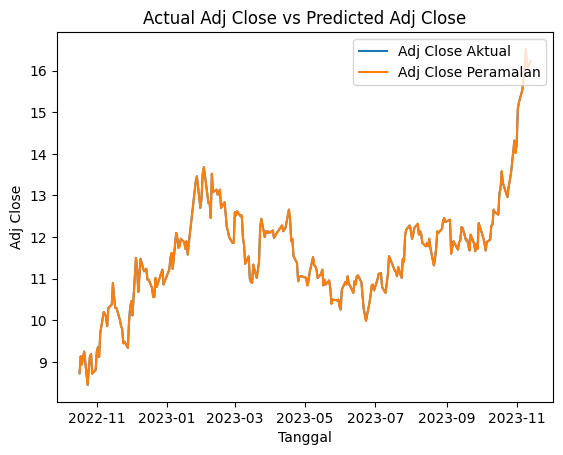

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt_y['ds']), dt_y['y'], label='Adj Close Aktual')
plt.plot(pd.to_datetime(pred['ds']), pred['yhat'], label='Adj Close Peramalan')
plt.title('Actual Adj Close vs Predicted Adj Close')
plt.xlabel('Tanggal')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **P-P Model**

### **Performance Scores**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(dt2_y['y'], pred2['yhat'])

# Calculate the Mean Absolute Percentage Error
r2 = r2_score(dt2_y['y'], pred2['yhat'])

print(f'MAPE (%) :\n{mape:.18f}\n')
print(f'Rsquared :\n{r2:.18f}')

MAPE (%) :
0.167985952557118012

Rsquared :
-2.101576433107766650


### **Actual VS Predicted**

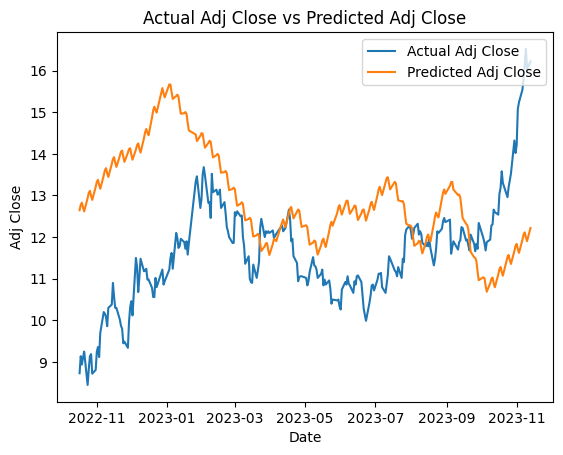

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt2_y['ds']), dt2_y['y'], label='Adj Close Aktual')
plt.plot(pd.to_datetime(pred2['ds']), pred2['yhat'], label='Adj Close Peramalan')
plt.title('Actual Adj Close vs Predicted Adj Close')
plt.xlabel('Tanggal')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **PR Model**

### **Performance Scores**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(dt3_y['y'], pred3['yhat'])

# Calculate the Mean Absolute Percentage Error
r2 = r2_score(dt3_y['y'], pred3['yhat'])

print(f'MAPE (%) :\n{mape:.18f}\n')
print(f'Rsquared :\n{r2:.18f}')

MAPE (%) :
0.000018183158432353

Rsquared :
0.999999955778972494


### **Actual VS Predicted**

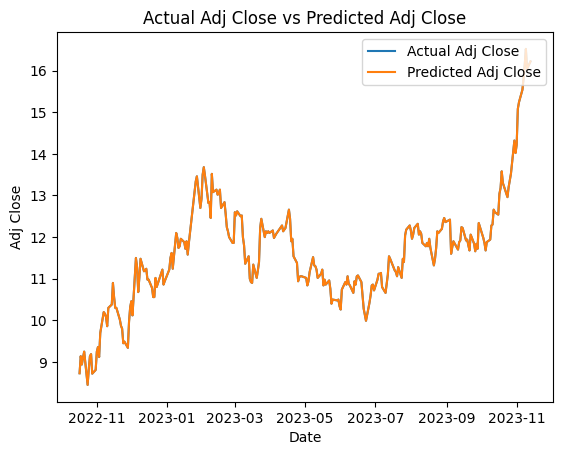

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt3_y['ds']), dt3_y['y'], label='Adj Close Aktual')
plt.plot(pd.to_datetime(pred3['ds']), pred3['yhat'], label='Adj Close Peramalan')
plt.title('Actual Adj Close vs Predicted Adj Close')
plt.xlabel('Tanggal')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **P Model**

### **Performance Scores**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape = mean_absolute_percentage_error(dt4_y['y'], pred4['yhat'])

# Calculate the Mean Absolute Percentage Error
r2 = r2_score(dt4_y['y'], pred4['yhat'])

print(f'MAPE (%) :\n{mape:.18f}\n')
print(f'Rsquared :\n{r2:.18f}')

MAPE (%) :
0.863108141463399647

Rsquared :
-74.620409607849140343


### **Actual VS Predicted**

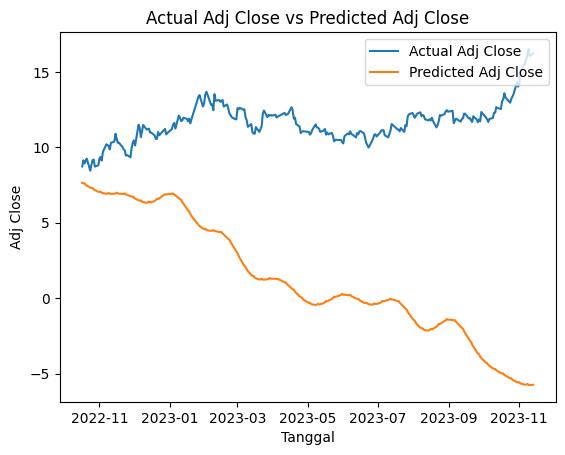

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt4_y['ds']), dt4_y['y'], label='Adj Close Aktual')
plt.plot(pd.to_datetime(pred4['ds']), pred4['yhat'], label='Adj Close Peramalan')
plt.title('Actual Adj Close vs Predicted Adj Close')
plt.xlabel('Tanggal')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

# **Save Models**

## **P-PR Model**

In [ ]:
with open('P-PR Model.json', 'w') as fout:
    fout.write(model_to_json(model))

## **P-P Model**

In [ ]:
with open('P-P Model.json', 'w') as fout:
    fout.write(model_to_json(model2))

## **PR Model**

In [ ]:
with open('PR Model.json', 'w') as fout:
    fout.write(model_to_json(model3))

## **P Model**

In [ ]:
with open('P Model.json', 'w') as fout:
    fout.write(model_to_json(model4))

# **[&ensp; ] -------------------- LOAD MODELS -------------------- [&ensp; ]**
* *If the models have been uploaded in the Files section*

# **Load Saved Models**

## **P-PR Model**

In [ ]:
with open('P-PR Model.json', 'r') as fin:
    model_x = model_from_json(fin.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


## **P-P Model**

In [ ]:
with open('P-P Model.json', 'r') as fin:
    model2_x = model_from_json(fin.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


## **PR Model**

In [ ]:
with open('PR Model.json', 'r') as fin:
    model3_x = model_from_json(fin.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


In [ ]:
model3_x.changepoints_t

array([0.03082852, 0.06229929, 0.09377007, 0.12652537, 0.15863841,
       0.19332049, 0.22543353, 0.25626204, 0.28709056, 0.3192036 ,
       0.35131663, 0.38342967, 0.41554271, 0.44894027, 0.48041105,
       0.50995504, 0.54463712, 0.57482338, 0.60693642, 0.63904945,
       0.67180475, 0.70520231, 0.73474631, 0.76878613, 0.79961464])

In [ ]:
model3_x.y_scale

35.299999

## **P Model**

In [ ]:
with open('P Model.json', 'r') as fin:
    model4_x = model_from_json(fin.read())

/usr/local/lib/python3.10/dist-packages/prophet/serialize.py:172: FutureWarning: The behavior of Timestamp.utcfromtimestamp is deprecated, in a future version will return a timezone-aware Timestamp with UTC timezone. To keep the old behavior, use Timestamp.utcfromtimestamp(ts).tz_localize(None). To get the future behavior, use Timestamp.fromtimestamp(ts, 'UTC')
  setattr(model, attribute, pd.Timestamp.utcfromtimestamp(model_dict[attribute]).tz_localize(None))


# **Evaluation on the Loaded Models**

## **P-PR Model**

### **P-PR Model Components**

In [ ]:
print('Hiperparameter Model PSO dan Prophet dengan Regressor Tambahan\n----------------------\n')
print('Hiperparameter changepoint_prior_scale :\n-->', model_x.changepoint_prior_scale, '\n')
print('Hiperparameter seasonality_prior_scale :\n-->', model_x.seasonality_prior_scale, '\n')
print('Hiperparameter holidays_prior_scale :\n-->', model_x.holidays_prior_scale)

Hiperparameter Model PSO dan Prophet dengan Regressor Tambahan
----------------------

Hiperparameter changepoint_prior_scale :
--> 0.001 

Hiperparameter seasonality_prior_scale :
--> 2.008046650605594 

Hiperparameter holidays_prior_scale :
--> 10.0


In [ ]:
model_x.preprocess(model_x.history).sigmas

INFO:prophet:Found custom seasonality named 'yearly', disabling built-in 'yearly' seasonality.
INFO:prophet:Found custom seasonality named 'weekly', disabling built-in 'weekly' seasonality.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


[2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 2.008046650605594,
 10.0,
 10.0,
 10.0,
 10.0,
 10.0]

In [ ]:
model_x.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 2.008046650605594,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 2.008046650605594,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model_x.extra_regressors

OrderedDict([('Open',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': -9.491880189281035e-14,
               'std': 0.9999999999990453,
               'mode': 'additive'}),
             ('High',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 9.486487075537125e-14,
               'std': 0.9999999999999011,
               'mode': 'additive'}),
             ('Low',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 9.481093961793216e-14,
               'std': 1.0000000000006173,
               'mode': 'additive'}),
             ('Close',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 1.5180536566356965e-12,
               'std': 0.999999999999246,
               'mode': 'additive'}),
             ('Volume',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': -4.7

In [ ]:
model_x.params['delta']

array([[-6.87941e-09, -3.32837e-09,  6.99463e-10, -1.03034e-08,
         8.80473e-09,  1.36892e-09, -7.51435e-10,  3.23001e-09,
        -1.05076e-09, -1.76660e-09, -1.24938e-09, -1.53458e-09,
         3.89668e-09,  4.07795e-09,  2.66285e-09,  1.53812e-09,
         1.42143e-09, -1.65646e-09,  3.24820e-09, -2.42308e-09,
        -2.40189e-09,  3.06991e-09,  1.69573e-08,  7.26296e-09,
         3.90354e-08]])

In [ ]:
deltas = np.nanmean(model_x.params['delta'], axis=0)

In [ ]:
deltas

array([-6.87941e-09, -3.32837e-09,  6.99463e-10, -1.03034e-08,
        8.80473e-09,  1.36892e-09, -7.51435e-10,  3.23001e-09,
       -1.05076e-09, -1.76660e-09, -1.24938e-09, -1.53458e-09,
        3.89668e-09,  4.07795e-09,  2.66285e-09,  1.53812e-09,
        1.42143e-09, -1.65646e-09,  3.24820e-09, -2.42308e-09,
       -2.40189e-09,  3.06991e-09,  1.69573e-08,  7.26296e-09,
        3.90354e-08])

In [ ]:
df = model_x.setup_dataframe(dt_pred.copy())

In [ ]:
seasonal_features, _, component_cols, _ = (
            model_x.make_all_seasonality_features(df)
        )

In [ ]:
seasonal_features.values

array([[-9.66618010e-01,  2.56221822e-01, -4.95337255e-01, ...,
         8.50000000e+00,  8.73000000e+00,  7.97756990e+07],
       [-9.62067572e-01,  2.72811264e-01, -5.24925742e-01, ...,
         8.76000000e+00,  9.14000000e+00,  1.03845201e+08],
       [-9.57232443e-01,  2.89319978e-01, -5.53892938e-01, ...,
         8.93000000e+00,  8.94000000e+00,  8.30393100e+07],
       ...,
       [-7.95801301e-01,  6.05557833e-01, -9.63807423e-01, ...,
         1.62600000e+01,  1.65200000e+01,  1.62320904e+08],
       [-7.85267007e-01,  6.19157272e-01, -9.72407556e-01, ...,
         1.59400000e+01,  1.60400010e+01,  1.66672948e+08],
       [-7.52282698e-01,  6.58840453e-01, -9.91268547e-01, ...,
         1.59200000e+01,  1.62199990e+01,  1.51924036e+08]])

In [ ]:
seasonal_features

yearly_delim_1  yearly_delim_2  yearly_delim_3  yearly_delim_4  \
0         -0.966618        0.256222       -0.495337       -0.868701   
1         -0.962068        0.272811       -0.524926       -0.851148   
2         -0.957232        0.289320       -0.553893       -0.832588   
3         -0.952114        0.305743       -0.582205       -0.813042   
4         -0.946714        0.322076       -0.609827       -0.792534   
..              ...             ...             ...             ...   
259       -0.816160        0.577825       -0.943196       -0.332235   
260       -0.806100        0.591779       -0.954067       -0.299595   
261       -0.795801        0.605558       -0.963807       -0.266599   
262       -0.785267        0.619157       -0.972408       -0.233289   
263       -0.752283        0.658840       -0.991269       -0.131859   

     yearly_delim_5  yearly_delim_6  yearly_delim_7  yearly_delim_8  \
0          0.712786       -0.701382        0.860600        0.509282   
1          0.675656       -0.737217        0.893579        0.448906   
2          0.636728       -0.771089        0.922329        0.386405   
3          0.596104       -0.802907        0.946714        0.322076   
4          0.553893       -0.832588        0.966618        0.256222   
..              ...             ...             ...             ...   
259       -0.273845       -0.961774        0.626727       -0.779239   
260       -0.323093       -0.946367        0.571667       -0.820486   
261       -0.371481       -0.928441        0.513901       -0.857849   
262       -0.418879       -0.908042        0.453703       -0.891153   
263       -0.553893       -0.832588        0.261414       -0.965227   

     yearly_delim_9  yearly_delim_10  ...  weekly_delim_2  weekly_delim_3  \
0         -0.271777         0.962360  ...       -0.900969    7.818315e-01   
1         -0.188099         0.982150  ...       -0.222521    4.338837e-01   
2         -0.103031         0.994678  ...        0.623490   -9.749279e-01   
3         -0.017202         0.999852  ...        1.000000    1.705773e-12   
4          0.068755         0.997634  ...        0.623490    9.749279e-01   
..              ...              ...  ...             ...             ...   
259        0.998123         0.061245  ...       -0.222521    4.338837e-01   
260        0.999694        -0.024726  ...        0.623490   -9.749279e-01   
261        0.993875        -0.110514  ...        1.000000   -5.668181e-12   
262        0.980707        -0.195486  ...        0.623490    9.749279e-01   
263        0.898354        -0.439273  ...       -0.900969    7.818315e-01   

     weekly_delim_4  weekly_delim_5  weekly_delim_6       Open       High  \
0          0.623490   -9.749279e-01       -0.222521   8.600000   8.890000   
1         -0.900969    7.818315e-01        0.623490   8.920000   9.190000   
2         -0.222521   -4.338837e-01       -0.900969   9.140000   9.180000   
3          1.000000   -1.079319e-12        1.000000   8.840000   9.200000   
4         -0.222521    4.338837e-01       -0.900969   9.260000   9.310000   
..              ...             ...             ...        ...        ...   
259       -0.900969    7.818315e-01        0.623490  15.300000  15.960000   
260       -0.222521   -4.338837e-01       -0.900969  15.880000  16.400000   
261        1.000000   -4.864293e-12        1.000000  16.320000  16.940001   
262       -0.222521    4.338837e-01       -0.900969  16.219999  16.719999   
263        0.623490   -9.749279e-01       -0.222521  16.420000  16.620001   

       Low      Close        Volume  
0     8.50   8.730000  7.977570e+07  
1     8.76   9.140000  1.038452e+08  
2     8.93   8.940000  8.303931e+07  
3     8.66   9.110000  1.135277e+08  
4     9.09   9.250000  7.697026e+07  
..     ...        ...           ...  
259  15.30  15.820000  1.002779e+08  
260  15.76  16.139999  1.417488e+08  
261  16.26  16.520000  1.623209e+08  
262  15.94  16.040001  1.666729e+08  
263  15.92  16.219999  1.519240

In [ ]:
seasonal_features.shape[0]

264

In [ ]:
component_cols.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume', 'additive_terms',
       'extra_regressors_additive', 'weekly', 'yearly',
       'multiplicative_terms'],
      dtype='object', name='component')

In [ ]:
X = seasonal_features.values
data = {}

In [ ]:
X

array([[-9.66618010e-01,  2.56221822e-01, -4.95337255e-01, ...,
         8.50000000e+00,  8.73000000e+00,  7.97756990e+07],
       [-9.62067572e-01,  2.72811264e-01, -5.24925742e-01, ...,
         8.76000000e+00,  9.14000000e+00,  1.03845201e+08],
       [-9.57232443e-01,  2.89319978e-01, -5.53892938e-01, ...,
         8.93000000e+00,  8.94000000e+00,  8.30393100e+07],
       ...,
       [-7.95801301e-01,  6.05557833e-01, -9.63807423e-01, ...,
         1.62600000e+01,  1.65200000e+01,  1.62320904e+08],
       [-7.85267007e-01,  6.19157272e-01, -9.72407556e-01, ...,
         1.59400000e+01,  1.60400010e+01,  1.66672948e+08],
       [-7.52282698e-01,  6.58840453e-01, -9.91268547e-01, ...,
         1.59200000e+01,  1.62199990e+01,  1.51924036e+08]])

In [ ]:
beta_c = model_x.params['beta'] * component_cols['weekly'].values
comp = np.matmul(X, beta_c.transpose())

In [ ]:
beta_c

array([[ 0.        , -0.        ,  0.        , -0.        , -0.        ,
         0.        ,  0.        ,  0.        , -0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        -0.        , -0.        ,  0.        , -0.        ,  0.        ,
         0.0179991 , -0.0143538 , -0.0155321 , -0.0035451 ,  0.00246702,
         0.00512282,  0.        , -0.        , -0.        ,  0.        ,
         0.        ]])

In [ ]:
beta_c.transpose()

array([[ 0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [ 0.        ],
       [-0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.0179991 ],
       [-0.0143538 ],
       [-0.0155321 ],
       [-0.0035451 ],
       [ 0.00246702],
       [ 0.00512282],
       [ 0.        ],
       [-0.        ],
       [-0.        ],
       [ 0.        ],
       [ 0.        ]])

In [ ]:
comp

array([[-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0.01277611],
       [-0.01277608],
       [-0.01277608],
       [-0.01277608],
       [-0.01277611],
       [-0

In [ ]:
comp.shape[0]

264

In [ ]:
comp *= model_x.y_scale

In [ ]:
comp

array([[-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0.45099666],
       [-0.45099579],
       [-0.45099545],
       [-0.45099561],
       [-0.4509965 ],
       [-0

In [ ]:
data['weekly'] = np.nanmean(comp, axis=1)

In [ ]:
np.array(data)

array({'weekly': array([-0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099666, -0.45099579, -0.45099545, -0.45099561, -0.4509965 ,
       -0.45099545, -0.45099561, -0.4509965 , -0.45099579, -0.45099545,
       -0.45099561, -0.4509965 , -0.45099666, -0.45099579, -0.45099545,
       -0.45099561, -0.4509965 , -0.45099666, -0.45099579, -0.45099545,
       -0.45099561, -0.4509965 , -0.45099561, -

In [ ]:
# for component in component_cols.columns:
#   beta_c = model_x.params['beta'] * component_cols[component].values

#   comp = np.matmul(X, beta_c.transpose())
#   if component in model_x.component_modes['additive']:
#     comp *= model_x.y_scale

#   data[component] = np.nanmean(comp, axis=1)

### **Training Results**

In [ ]:
print('Hiperparameter Model PSO dan Prophet dengan Regressor Tambahan\n----------------------\n')
print('Hiperparameter changepoint_prior_scale :\n-->', model_x.changepoint_prior_scale, '\n')
print('Hiperparameter seasonality_prior_scale :\n-->', model_x.seasonality_prior_scale, '\n')
print('Hiperparameter holidays_prior_scale :\n-->', model_x.holidays_prior_scale)

Hiperparameter Model PSO dan Prophet dengan Regressor Tambahan
----------------------

Hiperparameter changepoint_prior_scale :
--> 0.001 

Hiperparameter seasonality_prior_scale :
--> 2.008046650605594 

Hiperparameter holidays_prior_scale :
--> 10.0


In [ ]:
model_x.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 2.008046650605594,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 2.008046650605594,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model_x.extra_regressors

OrderedDict([('Open',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': -9.491880189281035e-14,
               'std': 0.9999999999990453,
               'mode': 'additive'}),
             ('High',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 9.486487075537125e-14,
               'std': 0.9999999999999011,
               'mode': 'additive'}),
             ('Low',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 9.481093961793216e-14,
               'std': 1.0000000000006173,
               'mode': 'additive'}),
             ('Close',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 1.5180536566356965e-12,
               'std': 0.999999999999246,
               'mode': 'additive'}),
             ('Volume',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': -4.7

In [ ]:
model_x.params['k']

array([[-7.59039e-08]])

In [ ]:
model_x.params['m']

array([[0.47416]])

In [ ]:
model_x.params['sigma_obs']

array([[0.00029149]])

In [ ]:
model_x.y_scale

35.299999

In [ ]:
model_x.changepoints

34    2018-08-27
67    2018-10-15
101   2018-12-03
135   2019-01-23
168   2019-03-14
202   2019-05-07
236   2019-06-26
269   2019-08-13
303   2019-09-30
337   2019-11-19
370   2020-01-08
404   2020-02-27
438   2020-04-17
472   2020-06-08
505   2020-07-27
539   2020-09-11
573   2020-11-04
606   2020-12-21
640   2021-02-09
674   2021-03-31
707   2021-05-21
741   2021-07-12
775   2021-08-27
808   2021-10-19
842   2021-12-06
Name: ds, dtype: datetime64[ns]

In [ ]:
model_x.params['delta']

array([[-6.87941e-09, -3.32837e-09,  6.99463e-10, -1.03034e-08,
         8.80473e-09,  1.36892e-09, -7.51435e-10,  3.23001e-09,
        -1.05076e-09, -1.76660e-09, -1.24938e-09, -1.53458e-09,
         3.89668e-09,  4.07795e-09,  2.66285e-09,  1.53812e-09,
         1.42143e-09, -1.65646e-09,  3.24820e-09, -2.42308e-09,
        -2.40189e-09,  3.06991e-09,  1.69573e-08,  7.26296e-09,
         3.90354e-08]])

In [ ]:
model_x.params['beta']

array([[ 2.99055e-09, -2.75113e-10,  3.63527e-09, -4.67740e-09,
        -1.57724e-09,  6.93794e-10,  4.99076e-09,  1.43295e-09,
        -1.08296e-09,  4.36183e-09,  2.62398e-09,  2.73039e-09,
         2.05352e-09,  3.25542e-09, -2.30956e-09, -4.32527e-10,
        -4.21812e-09,  1.80259e-09, -1.22559e-09,  7.02865e-10,
         1.79991e-02, -1.43538e-02, -1.55321e-02, -3.54510e-03,
         2.46702e-03,  5.12282e-03,  3.45125e-07, -1.46162e-06,
        -3.52211e-07,  1.87136e-01,  1.46528e-08]])

### **Predict**

In [ ]:
# Predict
pred1x = model_x.predict(dt_pred)

In [ ]:
pred1x[['ds','trend','Open','High','Low','Close','Volume','weekly','yearly','yhat']]

ds      trend          Open          High           Low     Close  \
0   2022-10-17  16.737845 -1.419342e-05  5.889977e-05  1.438548e-05 -7.556908   
1   2022-10-18  16.737845 -1.360524e-05  5.661867e-05  1.388471e-05 -7.146905   
2   2022-10-19  16.737845 -1.320087e-05  5.669471e-05  1.355728e-05 -7.346907   
3   2022-10-20  16.737845 -1.375229e-05  5.654264e-05  1.407731e-05 -7.176905   
4   2022-10-21  16.737845 -1.298030e-05  5.570623e-05  1.324912e-05 -7.036904   
..         ...        ...           ...           ...           ...       ...   
259 2023-11-07  16.737845 -1.878339e-06  5.141919e-06  1.288451e-06 -0.466854   
260 2023-11-08  16.737845 -8.122571e-07  1.796310e-06  4.024752e-07 -0.146852   
261 2023-11-09  16.737845 -3.505216e-09 -2.309672e-06 -5.605416e-07  0.233152   
262 2023-11-10  16.737845 -1.873143e-07 -6.368525e-07  5.578918e-08 -0.246851   
263 2023-11-13  16.737845  1.803020e-07  1.234979e-07  9.430986e-08 -0.066852   

           Volume    weekly        yearly       yhat  
0   -2.301488e-07 -0.450997 -4.571329e-08   8.729999  
1   -1.218316e-07 -0.450996 -6.184156e-08   9.140001  
2   -2.154619e-07 -0.450995 -7.526912e-08   8.940000  
3   -7.825843e-08 -0.450996 -8.557314e-08   9.110001  
4   -2.427737e-07 -0.450997 -9.240050e-08   9.250000  
..            ...       ...           ...        ...  
259 -1.378850e-07 -0.450996  1.980479e-07  15.820000  
260  4.874144e-08 -0.450995  2.092608e-07  16.139999  
261  1.413199e-07 -0.450996  2.150959e-07  16.519999  
262  1.609049e-07 -0.450997  2.149461e-07  16.039997  
263  9.453207e-08 -0.450997  1.742137e-07  16.219997  

[264 rows x 10 columns]

### **Model Performance**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape1x = (mean_absolute_percentage_error(dt_y['y'], pred1x['yhat']))*100

# Calculate the R Squared
rsq1x = r2_score(dt_y['y'], pred1x['yhat'])

print(f'MAPE (0% to 100%) :\n{mape1x:.18f}\n')
print(f'R2 (-∞ to 1) :\n{rsq1x:.18f}')

MAPE (0% to 100%) :
0.000008522366072657

R2 (-∞ to 1) :
0.999999999999060529


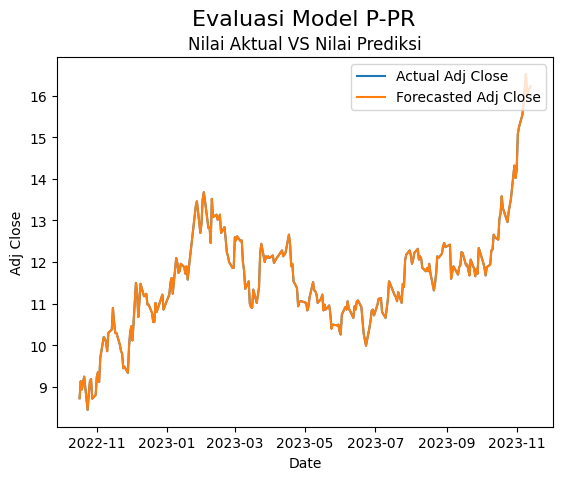

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt_y['ds']), dt_y['y'], label='Actual Adj Close')
plt.plot(pd.to_datetime(pred1x['ds']), pred1x['yhat'], label='Forecasted Adj Close')
plt.suptitle('Evaluasi Model P-PR', x=0.51, fontsize=16)
plt.title('Nilai Aktual VS Nilai Prediksi', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **P-P Model**

### **Training Results**

In [ ]:
print('Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan\n----------------------\n')
print('Hiperparameter changepoint_prior_scale :\n-->', model2_x.changepoint_prior_scale, '\n')
print('Hiperparameter seasonality_prior_scale :\n-->', model2_x.seasonality_prior_scale, '\n')
print('Hiperparameter holidays_prior_scale :\n-->', model2_x.holidays_prior_scale)

Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan
----------------------

Hiperparameter changepoint_prior_scale :
--> 0.001 

Hiperparameter seasonality_prior_scale :
--> 0.7997240181223719 

Hiperparameter holidays_prior_scale :
--> 2.9803328008381045


In [ ]:
model2_x.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 0.7997240181223719,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 0.7997240181223719,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model2_x.extra_regressors

OrderedDict()

In [ ]:
model2_x.params['k']

array([[-0.180173]])

In [ ]:
model2_x.params['m']

array([[0.564663]])

In [ ]:
model2_x.params['sigma_obs']

array([[0.204222]])

In [ ]:
model2_x.y_scale

35.299999

In [ ]:
model2_x.changepoints

34    2018-08-27
67    2018-10-15
101   2018-12-03
135   2019-01-23
168   2019-03-14
202   2019-05-07
236   2019-06-26
269   2019-08-13
303   2019-09-30
337   2019-11-19
370   2020-01-08
404   2020-02-27
438   2020-04-17
472   2020-06-08
505   2020-07-27
539   2020-09-11
573   2020-11-04
606   2020-12-21
640   2021-02-09
674   2021-03-31
707   2021-05-21
741   2021-07-12
775   2021-08-27
808   2021-10-19
842   2021-12-06
Name: ds, dtype: datetime64[ns]

In [ ]:
model2_x.params['delta']

array([[ 1.51894e-07,  6.42259e-08,  1.25590e-09,  2.56142e-07,
         7.32815e-10,  6.03231e-10,  1.09816e-05,  9.61192e-09,
        -1.17428e-09,  1.12881e-09, -1.03336e-09,  3.36967e-09,
        -3.82177e-10, -3.94726e-09, -4.20969e-09,  3.22205e-09,
        -6.78340e-09,  3.01538e-10,  4.23398e-09, -1.12187e-09,
         3.72713e-09, -4.97428e-09,  5.87362e-09, -1.72043e-11,
         1.90056e-09]])

In [ ]:
model2_x.params['beta']

array([[-2.74186e-03,  1.59017e-02,  7.92076e-03,  2.55726e-02,
         1.71587e-03,  8.99122e-03, -1.99716e-03,  1.79544e-03,
         3.27200e-03, -6.87132e-03,  2.00177e-03,  7.70457e-03,
        -5.08650e-03,  5.46310e-03,  4.30735e-03, -3.05659e-03,
        -2.53539e-03,  2.55763e-03,  9.82249e-05,  2.40751e-03,
        -1.01640e-02,  4.89618e-03,  4.58025e-03,  5.29730e-04,
        -1.53118e-03, -1.53508e-03]])

### **Predict**

In [ ]:
# Predict
pred2x = model2_x.predict(dt2_pred)

In [ ]:
pred2x[['ds','trend','weekly','yearly','yhat']]

ds      trend    weekly    yearly       yhat
0   2022-10-17  13.560559  0.202775 -1.117518  12.645815
1   2022-10-18  13.556474  0.288594 -1.071512  12.773555
2   2022-10-19  13.552389  0.298757 -1.025148  12.825998
3   2022-10-20  13.548305  0.137346 -0.978792  12.706859
4   2022-10-21  13.544220  0.006087 -0.932729  12.617578
..         ...        ...       ...       ...        ...
259 2023-11-07  11.983908  0.288594 -0.209515  12.062987
260 2023-11-08  11.979823  0.298757 -0.164630  12.113951
261 2023-11-09  11.975739  0.137346 -0.119674  11.993411
262 2023-11-10  11.971654  0.006087 -0.074876  11.902865
263 2023-11-13  11.959401  0.202775  0.055755  12.217931

[264 rows x 5 columns]

### **Model Performance**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape2x = (mean_absolute_percentage_error(dt_y['y'], pred2x['yhat']))*100

# Calculate the R Squared
rsq2x = r2_score(dt_y['y'], pred2x['yhat'])

print(f'MAPE (%) :\n{mape2x:.18f}\n')
print(f'R2 (-∞ to 1) :\n{rsq2x:.18f}')

MAPE (%) :
16.798595255711802565

R2 (-∞ to 1) :
-2.101576433107766650


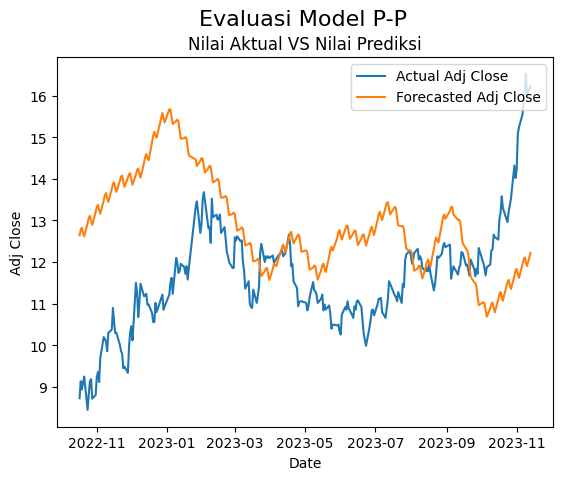

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt_y['ds']), dt_y['y'], label='Actual Adj Close')
plt.plot(pd.to_datetime(pred2x['ds']), pred2x['yhat'], label='Forecasted Adj Close')
plt.suptitle('Evaluasi Model P-P', x=0.51, fontsize=16)
plt.title('Nilai Aktual VS Nilai Prediksi', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **PR Model**

### **Training Results**

In [ ]:
print('Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan\n----------------------\n')
print('Hiperparameter changepoint_prior_scale :\n-->', model3_x.changepoint_prior_scale, '\n')
print('Hiperparameter seasonality_prior_scale :\n-->', model3_x.seasonality_prior_scale, '\n')
print('Hiperparameter holidays_prior_scale :\n-->', model3_x.holidays_prior_scale)

Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan
----------------------

Hiperparameter changepoint_prior_scale :
--> 0.05 

Hiperparameter seasonality_prior_scale :
--> 10.0 

Hiperparameter holidays_prior_scale :
--> 10.0


In [ ]:
model3_x.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model3_x.extra_regressors

OrderedDict([('Open',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 16.321907006641364,
               'std': 6.628091429121032,
               'mode': 'additive'}),
             ('High',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 16.63624291081594,
               'std': 6.7855754205666114,
               'mode': 'additive'}),
             ('Low',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 15.968965841555978,
               'std': 6.455260134570907,
               'mode': 'additive'}),
             ('Close',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 16.28685009962049,
               'std': 6.605849675889029,
               'mode': 'additive'}),
             ('Volume',
              {'prior_scale': 10.0,
               'standardize': 'auto',
               'mu': 130917770.59013283,
  

In [ ]:
model3_x.params['k']

array([[0.00028279]])

In [ ]:
model3_x.params['m']

array([[0.474143]])

In [ ]:
model3_x.params['sigma_obs']

array([[0.00022857]])

In [ ]:
model3_x.y_scale

35.299999

In [ ]:
model3_x.changepoints

34    2018-08-27
67    2018-10-15
101   2018-12-03
135   2019-01-23
168   2019-03-14
202   2019-05-07
236   2019-06-26
269   2019-08-13
303   2019-09-30
337   2019-11-19
370   2020-01-08
404   2020-02-27
438   2020-04-17
472   2020-06-08
505   2020-07-27
539   2020-09-11
573   2020-11-04
606   2020-12-21
640   2021-02-09
674   2021-03-31
707   2021-05-21
741   2021-07-12
775   2021-08-27
808   2021-10-19
842   2021-12-06
Name: ds, dtype: datetime64[ns]

In [ ]:
model3_x.params['delta']

array([[-8.33402e-05,  2.33308e-04, -1.12206e-04, -1.44224e-04,
        -3.31367e-04, -3.05576e-04,  1.40234e-04,  1.63221e-04,
         1.54885e-05,  4.57185e-04, -1.83500e-04,  3.29802e-04,
        -3.89049e-04, -3.90371e-04,  3.44357e-04, -2.36151e-04,
         3.07884e-04, -3.01776e-04,  3.52266e-04, -1.80620e-04,
         3.06090e-04, -2.45102e-04, -2.58822e-04,  1.36317e-04,
         1.19496e-04]])

In [ ]:
model3_x.params['beta']

array([[-5.88887e-06,  1.78829e-06,  2.08251e-07, -2.22070e-07,
        -6.67443e-07, -1.05672e-06,  1.03907e-06, -6.21310e-07,
        -4.67475e-07,  2.59733e-07,  7.87019e-08,  2.26485e-07,
        -3.23445e-07, -6.42543e-08, -6.82964e-08,  3.46522e-07,
        -1.67318e-07,  4.97677e-07, -7.46819e-08,  8.94830e-08,
         1.80089e-02, -1.43616e-02, -1.55405e-02, -3.54723e-03,
         2.46847e-03,  5.12542e-03,  1.68284e-05, -4.81445e-05,
         1.13552e-04,  1.87051e-01,  3.72628e-06]])

### **Predict**

In [ ]:
# Predict
pred3x = model3_x.predict(dt3_pred)

In [ ]:
pred3x[['ds','trend','Open','High','Low','Close','Volume','weekly','yearly','yhat']]

ds      trend          Open      High       Low     Close  \
0   2022-10-17  16.738143 -6.920757e-04  0.001940 -0.004638 -7.553476   
1   2022-10-18  16.738144 -6.633957e-04  0.001865 -0.004476 -7.143659   
2   2022-10-19  16.738144 -6.436782e-04  0.001867 -0.004371 -7.343570   
3   2022-10-20  16.738145 -6.705657e-04  0.001862 -0.004538 -7.173646   
4   2022-10-21  16.738145 -6.329232e-04  0.001835 -0.004271 -7.033708   
..         ...        ...           ...       ...       ...       ...   
259 2023-11-07  16.738373 -9.158839e-05  0.000169 -0.000415 -0.466642   
260 2023-11-08  16.738374 -3.960590e-05  0.000059 -0.000130 -0.146786   
261 2023-11-09  16.738375 -1.709154e-07 -0.000076  0.000181  0.233046   
262 2023-11-10  16.738375 -9.133502e-06 -0.000021 -0.000018 -0.246739   
263 2023-11-13  16.738377  8.791582e-06  0.000004 -0.000030 -0.066821   

       Volume    weekly    yearly       yhat  
0   -0.000059 -0.451248  0.000270   8.730241  
1   -0.000031 -0.451235  0.000271   9.140215  
2   -0.000055 -0.451237  0.000272   8.940408  
3   -0.000020 -0.451254  0.000273   9.110151  
4   -0.000062 -0.451231  0.000273   9.250348  
..        ...       ...       ...        ...  
259 -0.000035 -0.451235  0.000273  15.820397  
260  0.000012 -0.451237  0.000273  16.140527  
261  0.000036 -0.451254  0.000273  16.520579  
262  0.000041 -0.451231  0.000273  16.040671  
263  0.000024 -0.451248  0.000269  16.220583  

[264 rows x 10 columns]

### **Model Performance**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape3x = (mean_absolute_percentage_error(dt_y['y'], pred3x['yhat']))*100

# Calculate the R Squared
rsq3x = r2_score(dt_y['y'], pred3x['yhat'])

print(f'MAPE (%) :\n{mape3x:.18f}\n')
print(f'R2 (-∞ to 1) :\n{rsq3x:.18f}')

MAPE (%) :
0.001818315843235261

R2 (-∞ to 1) :
0.999999955778972494


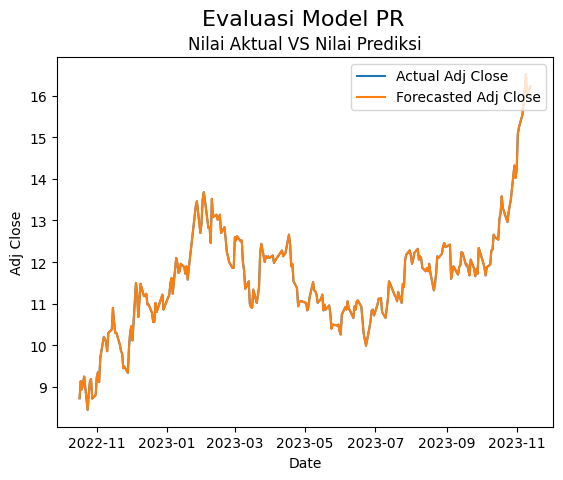

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt_y['ds']), dt_y['y'], label='Actual Adj Close')
plt.plot(pd.to_datetime(pred3x['ds']), pred3x['yhat'], label='Forecasted Adj Close')
plt.suptitle('Evaluasi Model PR', x=0.51, fontsize=16)
plt.title('Nilai Aktual VS Nilai Prediksi', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

## **P Model**

### **Training Results**

In [ ]:
print('Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan\n----------------------\n')
print('Hiperparameter changepoint_prior_scale :\n-->', model4_x.changepoint_prior_scale, '\n')
print('Hiperparameter seasonality_prior_scale :\n-->', model4_x.seasonality_prior_scale, '\n')
print('Hiperparameter holidays_prior_scale :\n-->', model4_x.holidays_prior_scale)

Hiperparameter Model PSO dan Prophet tanpa Regressor Tambahan
----------------------

Hiperparameter changepoint_prior_scale :
--> 0.05 

Hiperparameter seasonality_prior_scale :
--> 10.0 

Hiperparameter holidays_prior_scale :
--> 10.0


In [ ]:
model4_x.params['k']

array([[-1.58044]])

In [ ]:
model4_x.params['m']

array([[0.511374]])

In [ ]:
model4_x.params['sigma_obs']

array([[0.0359485]])

In [ ]:
model4_x.y_scale

35.299999

In [ ]:
model4_x.changepoints

34    2018-08-27
67    2018-10-15
101   2018-12-03
135   2019-01-23
168   2019-03-14
202   2019-05-07
236   2019-06-26
269   2019-08-13
303   2019-09-30
337   2019-11-19
370   2020-01-08
404   2020-02-27
438   2020-04-17
472   2020-06-08
505   2020-07-27
539   2020-09-11
573   2020-11-04
606   2020-12-21
640   2021-02-09
674   2021-03-31
707   2021-05-21
741   2021-07-12
775   2021-08-27
808   2021-10-19
842   2021-12-06
Name: ds, dtype: datetime64[ns]

In [ ]:
model4_x.params['delta']

array([[ 3.43067e-08,  2.32027e-01,  4.58975e-01,  3.67251e-01,
        -2.81994e-05, -3.14597e-01,  4.33476e-08,  7.20322e-01,
         8.87109e-01, -7.69994e-09, -8.18791e-08, -3.88399e-02,
         3.77061e-08,  1.89022e+00,  1.13326e+00,  1.24668e-07,
        -8.21522e-08, -3.73579e+00, -5.96101e-01, -3.33411e-08,
        -4.43653e-01, -1.04033e+00, -1.11200e-06,  3.81870e-08,
         5.31867e-01]])

In [ ]:
model4_x.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [ ]:
model4_x.params['beta']

array([[-1.79993e-02,  6.91916e-04,  1.43780e-02,  1.98099e-02,
         4.38394e-03,  6.70491e-03, -4.17836e-03,  3.64654e-03,
         2.66517e-03, -4.39613e-03,  1.96383e-03,  3.05714e-03,
        -6.48796e-03,  6.35184e-03,  6.69118e-03,  1.71832e-03,
         1.77823e-03,  3.29973e-03,  5.82232e-04, -2.42771e-05,
         5.75409e-03, -4.60831e-03, -5.84222e-03, -1.40301e-03,
         7.50260e-04,  1.44827e-03]])

In [ ]:
model4_x.extra_regressors

OrderedDict()

### **Predict**

In [ ]:
# Predict
pred4x = model4_x.predict(dt4_pred)

In [ ]:
pred4x[['ds','trend','weekly','yearly','yhat']]

ds     trend    weekly    yearly      yhat
0   2022-10-17  8.286829 -0.170879 -0.470025  7.645925
1   2022-10-18  8.252170 -0.154105 -0.479962  7.618103
2   2022-10-19  8.217510 -0.105702 -0.490315  7.621493
3   2022-10-20  8.182851 -0.161076 -0.501028  7.520747
4   2022-10-21  8.148191 -0.167229 -0.511978  7.468984
..         ...       ...       ...       ...       ...
259 2023-11-07 -5.091738 -0.154105 -0.471943 -5.717786
260 2023-11-08 -5.126398 -0.105702 -0.443954 -5.676054
261 2023-11-09 -5.161057 -0.161076 -0.413207 -5.735339
262 2023-11-10 -5.195717 -0.167229 -0.380054 -5.743000
263 2023-11-13 -5.299695 -0.170879 -0.270573 -5.741147

[264 rows x 5 columns]

### **Model Performance**

In [ ]:
# Calculate the Mean Absolute Percentage Error
mape4x = (mean_absolute_percentage_error(dt_y['y'], pred4x['yhat']))*100

# Calculate the R Squared
rsq4x = r2_score(dt_y['y'], pred4x['yhat'])

print(f'MAPE (%) :\n{mape4x:.18f}\n')
print(f'R2 (-∞ to 1) :\n{rsq4x:.18f}')

MAPE (%) :
86.310814146339964736

R2 (-∞ to 1) :
-74.620409607849140343


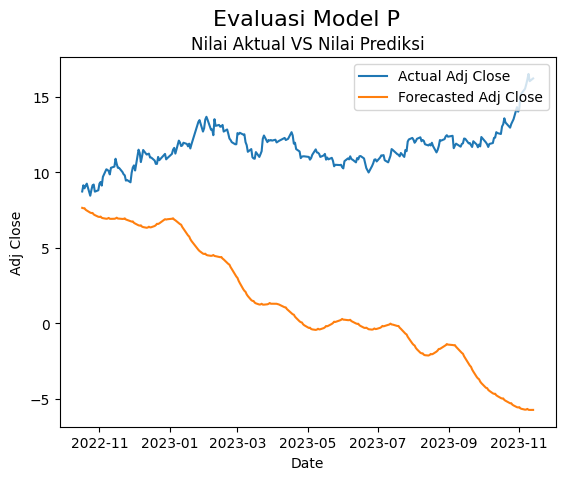

In [ ]:
# Plot the forecast
plt.plot(pd.to_datetime(dt_y['ds']), dt_y['y'], label='Actual Adj Close')
plt.plot(pd.to_datetime(pred4x['ds']), pred4x['yhat'], label='Forecasted Adj Close')
plt.suptitle('Evaluasi Model P', x=0.51, fontsize=16)
plt.title('Nilai Aktual VS Nilai Prediksi', fontsize=12)
plt.xlabel('Date')
plt.ylabel('Adj Close')
plt.legend(loc='upper right')
plt.show()

# **Final Results**

| No | Model | MAPE | R2 |
|----|-------|------|----|
| 1 | P-PR | <center> 8.522e-8 </center> | <center> 0.999999999999060529 </center> |
| 2 | PR | <center> 1.818e-5 </center> | <center> 0.999999955778972494 </center> |
| 3 | P-P | <center> 16,798 </center> | <center> -2.101576433107766650 </center> |
| 4 | P | <center> 86,311 </center> | <center> -74.620409607849140343 </center> |

# **[&ensp; ] -------------------- PREDICTION TEST -------------------- [&ensp; ]**

# **Testing Prediction**
* *Testing prediction for* **19-Oct-2023** *with Xiaomi Stock Prices data which date ranging from* **10-Jul-2018** *to* **18-Oct-2023**

## **Data Preprocessing**
* *Preparing the data that will be used for predictions*

In [ ]:
dt_predict = pd.DataFrame({
  'ds': pd.to_datetime(['2023-10-19']),
  'Open': 13.18,
  'High': 13.64,
  'Low': 13.04,
  'Close': 13.58,
  'Volume': 177275255
})

## **P-PR Model**

In [ ]:
# Predict
predxx = model_x.predict(dt_predict)

In [ ]:
predxx[['ds', 'yhat']].head()

ds   yhat
1176 2023-10-19  13.58

## **P-P Model**

In [ ]:
# Predict
pred2xx = model2_x.predict(dt_predict)

In [ ]:
pred2xx[['ds', 'yhat']].head()

ds      yhat
1176 2023-10-19  9.712985

## **PR Model**

In [ ]:
# Predict
pred3xx = model3_x.predict(dt_predict)

In [ ]:
pred3xx[['ds', 'yhat']].head()

ds       yhat
1176 2023-10-19  13.580393

## **P Model**

In [ ]:
# Predict
pred4xx = model4_x.predict(dt_predict)

In [ ]:
pred4xx[['ds', 'yhat']].head()

ds      yhat
1176 2023-10-19  1.015167

## **Actual Adjusted Closing Price**
* *Actual Adjusted Closing Price* **(Adj Close)** *of* **Xiaomi Corporation (1810.HK)** *at* **19-Oct-2023**

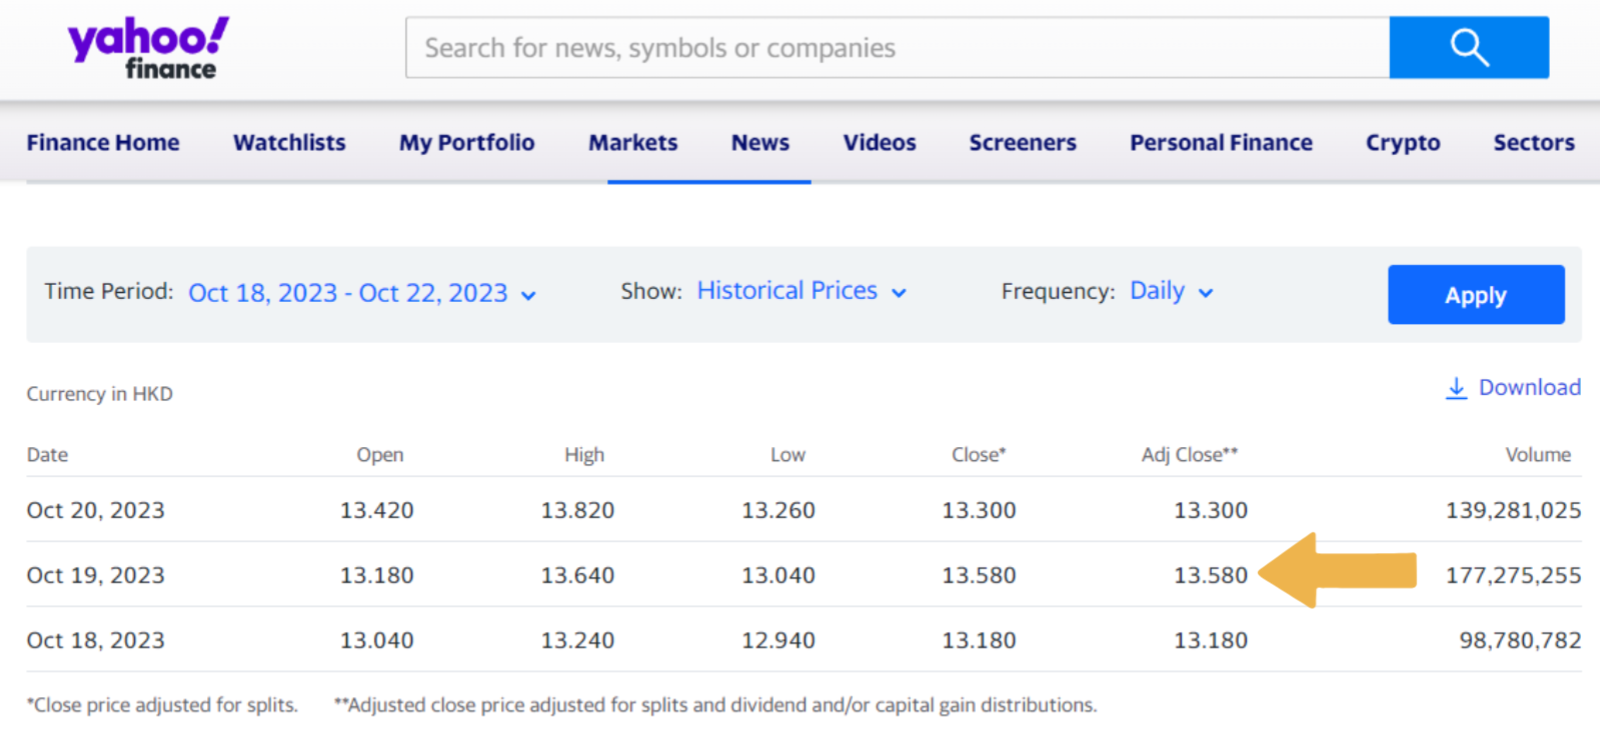